In [1]:
### libraries
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import GroupShuffleSplit

In [2]:
df_train = pd.read_csv("../deloitte/Coding DS dataset/train.csv")

In [3]:
print(df_train.info())
print(df_train.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7111 entries, 0 to 7110
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   date_time               7111 non-null   object 
 1   deg_C                   7111 non-null   float64
 2   relative_humidity       7111 non-null   float64
 3   absolute_humidity       7111 non-null   float64
 4   sensor_1                7111 non-null   float64
 5   sensor_2                7111 non-null   float64
 6   sensor_3                7111 non-null   float64
 7   sensor_4                7111 non-null   float64
 8   sensor_5                7111 non-null   float64
 9   target_carbon_monoxide  7111 non-null   float64
 10  target_benzene          7111 non-null   float64
 11  target_nitrogen_oxides  7111 non-null   float64
dtypes: float64(11), object(1)
memory usage: 666.8+ KB
None
(7111, 12)


In [4]:
df_test = pd.read_csv("../deloitte/Coding DS dataset/test.csv")

In [5]:
print(df_test.info())
print(df_test.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2247 entries, 0 to 2246
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   date_time          2247 non-null   object 
 1   deg_C              2247 non-null   float64
 2   relative_humidity  2247 non-null   float64
 3   absolute_humidity  2247 non-null   float64
 4   sensor_1           2247 non-null   float64
 5   sensor_2           2247 non-null   float64
 6   sensor_3           2247 non-null   float64
 7   sensor_4           2247 non-null   float64
 8   sensor_5           2247 non-null   float64
dtypes: float64(8), object(1)
memory usage: 158.1+ KB
None
(2247, 9)


# 1

In [6]:
#Vertically concatenate the two csvs into a new dataframe df_full;
df_full = pd.concat([df_train, df_test], axis=0)

In [7]:
df_full["date_time"] = pd.to_datetime(df_full["date_time"],infer_datetime_format=True)

In [8]:
print(df_full.shape)
print(df_full.info())

(9358, 12)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 9358 entries, 0 to 2246
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   date_time               9358 non-null   datetime64[ns]
 1   deg_C                   9358 non-null   float64       
 2   relative_humidity       9358 non-null   float64       
 3   absolute_humidity       9358 non-null   float64       
 4   sensor_1                9358 non-null   float64       
 5   sensor_2                9358 non-null   float64       
 6   sensor_3                9358 non-null   float64       
 7   sensor_4                9358 non-null   float64       
 8   sensor_5                9358 non-null   float64       
 9   target_carbon_monoxide  7111 non-null   float64       
 10  target_benzene          7111 non-null   float64       
 11  target_nitrogen_oxides  7111 non-null   float64       
dtypes: datetime64[ns](1), float64(11)
mem

# 2 filter

In [9]:
tcm = df_train["target_carbon_monoxide"].values
tb = df_train["target_benzene"].values
tno = df_train["target_nitrogen_oxides"].values

In [10]:
def get_random_value(x, target_var):
    if np.isnan(x):
        return random.choice(target_var)
    else:
        return x

In [11]:
#fill all missing values inside the test set with randomly selected values from the same column within the train set. 
df_full["target_carbon_monoxide"]=df_full["target_carbon_monoxide"].apply(get_random_value, args=(tcm,))
df_full["target_benzene"]=df_full["target_benzene"].apply(get_random_value, args=(tb,))
df_full["target_nitrogen_oxides"]=df_full["target_nitrogen_oxides"].apply(get_random_value, args=(tno,))


In [12]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9358 entries, 0 to 2246
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   date_time               9358 non-null   datetime64[ns]
 1   deg_C                   9358 non-null   float64       
 2   relative_humidity       9358 non-null   float64       
 3   absolute_humidity       9358 non-null   float64       
 4   sensor_1                9358 non-null   float64       
 5   sensor_2                9358 non-null   float64       
 6   sensor_3                9358 non-null   float64       
 7   sensor_4                9358 non-null   float64       
 8   sensor_5                9358 non-null   float64       
 9   target_carbon_monoxide  9358 non-null   float64       
 10  target_benzene          9358 non-null   float64       
 11  target_nitrogen_oxides  9358 non-null   float64       
dtypes: datetime64[ns](1), float64(11)
memory usage: 

In [13]:
df_full.head()

,date_time,deg_C,relative_humidity,absolute_humidity,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,target_carbon_monoxide,target_benzene,target_nitrogen_oxides
0,2010-03-10 18:00:00,13.1,46.0,0.7578,1387.2,1087.8,1056.0,1742.8,1293.4,2.5,12.0,167.7
1,2010-03-10 19:00:00,13.2,45.3,0.7255,1279.1,888.2,1197.5,1449.9,1010.9,2.1,9.9,98.9
2,2010-03-10 20:00:00,12.6,56.2,0.7502,1331.9,929.6,1060.2,1586.1,1117.0,2.2,9.2,127.1
3,2010-03-10 21:00:00,11.0,62.4,0.7867,1321.0,929.0,1102.9,1536.5,1263.2,2.2,9.7,177.2
4,2010-03-10 22:00:00,11.9,59.0,0.7888,1272.0,852.7,1180.9,1415.5,1132.2,1.5,6.4,121.8


In [14]:
df_full["day_of_week"] = df_full["date_time"].dt.dayofweek

In [15]:
def find_weekend(x):
    if x>4:
        return "weekend"
    else:
        return "weekday"

In [16]:
df_full["day_type"] = df_full["day_of_week"].apply(find_weekend)

In [17]:
df_full["day_type"].value_counts()

weekday    6669
weekend    2689
Name: day_type, dtype: int64

In [21]:
df_filtered = df_full[df_full["day_type"]=="weekday"]

In [22]:
df_filtered.shape

(6669, 14)

In [23]:
#Select only the weekdays, where the relative humidity is >50 and abso <1.4 denote this new dataframe
df_filtered = df_full[(df_full["relative_humidity"]>50.0) & (df_full["absolute_humidity"]<0.4)]

In [24]:
df_filtered.head()

,date_time,deg_C,relative_humidity,absolute_humidity,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,target_carbon_monoxide,target_benzene,target_nitrogen_oxides,day_of_week,day_type
601,2011-01-26 01:00:00,4.2,50.2,0.3939,732.8,516.2,1399.8,792.1,332.3,1.5,12.5,424.7,2,weekday
608,2011-01-26 08:00:00,3.2,52.2,0.3934,887.0,648.0,1105.6,904.7,482.7,0.4,5.2,177.0,2,weekday
649,2011-01-28 01:00:00,3.1,50.2,0.3716,892.0,588.5,1010.5,761.4,550.0,1.9,19.3,148.0,4,weekday
675,2011-01-29 03:00:00,1.5,53.4,0.3692,774.2,459.6,1279.7,736.0,325.9,1.8,11.3,145.0,5,weekend
676,2011-01-29 04:00:00,1.5,54.9,0.3687,799.3,458.4,1372.4,729.6,326.7,0.5,6.0,60.4,5,weekend


# 3

In [25]:
def create_sensor_combination(s2,s3,s4,median,mean):
    if s4 < median:
        return (s2*s3)
    else:
        return ((s2*s4) - mean)

In [26]:
df_filtered['monthly_median'] = (df_filtered.groupby(df_filtered['date_time'].dt.to_period('M'))
                          ['sensor_4'].transform('median')
                       )
df_filtered['monthly_mean'] = (df_filtered.groupby(df_filtered['date_time'].dt.to_period('M'))
                          ['sensor_4'].transform('mean')
                       )

/var/folders/08/dpzlrd_n27zb6zw32lf533640000gn/T/ipykernel_11617/3403751065.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['monthly_median'] = (df_filtered.groupby(df_filtered['date_time'].dt.to_period('M'))
/var/folders/08/dpzlrd_n27zb6zw32lf533640000gn/T/ipykernel_11617/3403751065.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['monthly_mean'] = (df_filtered.groupby(df_filtered['date_time'].dt.to_period('M'))


In [27]:
df_filtered["sensor_combination"] = df_filtered.apply(lambda row: create_sensor_combination(row['sensor_2'], row['sensor_3'],row['sensor_4'], row['monthly_median'], row['monthly_mean']), axis=1)


/var/folders/08/dpzlrd_n27zb6zw32lf533640000gn/T/ipykernel_11617/1998351705.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered["sensor_combination"] = df_filtered.apply(lambda row: create_sensor_combination(row['sensor_2'], row['sensor_3'],row['sensor_4'], row['monthly_median'], row['monthly_mean']), axis=1)


# 4 

In [28]:
# On df_full table find the min/max/mean/count of temp over each day as a table denote as df_group 
df_group = df_full.groupby(pd.Grouper(key='date_time', freq='D')).agg(Min=('deg_C', 'min'), Max=('deg_C', 'max'),Mean=('deg_C','mean'),Count =('deg_C','count'))


In [29]:
df_group

,Min,Max,Mean,Count
date_time,,,,
2010-03-10,11.0,13.2,12.166667,6
2010-03-11,7.7,11.4,9.762500,24
2010-03-12,5.7,16.2,11.133333,24
2010-03-13,6.2,19.0,12.779167,24
2010-03-14,10.0,22.7,15.800000,24
...,...,...,...,...
2011-03-31,12.0,23.9,17.583333,24
2011-04-01,12.6,20.4,15.737500,24
2011-04-02,10.6,22.6,15.458333,24


# 5 

In [32]:
def bin_sensor(x):
    if x < 0.2:
        return "0-0.2"
    elif x >= 0.2 and x <0.5:
        return "0.2-0.5"
    elif x >= 0.5 and x < 0.8:
        return "0.5-0.8"
    elif x > 0.8 and x < 0.85:
        return "0.8-0.85"
    elif x >= 0.85 and x <=1.00:
        return "0.85-1.00"
    else:
        return "no_bin_range_specified"

In [33]:
#Create a column “sensor_one_binned” 
#that will contain information on 
#which bin the sensor 1 value falls into. 
#The bins are as follows 0-0.2,
#0.2-0.5, 0.5-0.8, 0.8-0.85, 0.85-1. 
#You can represent which bins each items falls into with an number, letter, or any other reasonable schema so long as you make a clear comment as to how it is stored. 

### scaling values because values are not close to what is expected in question####
df_full["max_scaled_sensor_1"] = df_full["sensor_1"] /df_full["sensor_1"].max()
df_full["max_scaled_sensor_2"] = df_full["sensor_2"] /df_full["sensor_2"].max()

In [34]:
#Create a column “sensor_two_binned” and fill it by performing the same operation on sensor 2. 
df_full["sensor_one_binned"] = df_full["max_scaled_sensor_1"].apply(bin_sensor)
df_full["sensor_two_binned"] = df_full["max_scaled_sensor_2"].apply(bin_sensor)

In [35]:
df_full.head()

,date_time,deg_C,relative_humidity,absolute_humidity,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,target_carbon_monoxide,target_benzene,target_nitrogen_oxides,day_of_week,day_type,max_scaled_sensor_1,max_scaled_sensor_2,sensor_one_binned,sensor_two_binned
0,2010-03-10 18:00:00,13.1,46.0,0.7578,1387.2,1087.8,1056.0,1742.8,1293.4,2.5,12.0,167.7,2,weekday,0.664272,0.472422,0.5-0.8,0.2-0.5
1,2010-03-10 19:00:00,13.2,45.3,0.7255,1279.1,888.2,1197.5,1449.9,1010.9,2.1,9.9,98.9,2,weekday,0.612508,0.385738,0.5-0.8,0.2-0.5
2,2010-03-10 20:00:00,12.6,56.2,0.7502,1331.9,929.6,1060.2,1586.1,1117.0,2.2,9.2,127.1,2,weekday,0.637792,0.403718,0.5-0.8,0.2-0.5
3,2010-03-10 21:00:00,11.0,62.4,0.7867,1321.0,929.0,1102.9,1536.5,1263.2,2.2,9.7,177.2,2,weekday,0.632572,0.403457,0.5-0.8,0.2-0.5
4,2010-03-10 22:00:00,11.9,59.0,0.7888,1272.0,852.7,1180.9,1415.5,1132.2,1.5,6.4,121.8,2,weekday,0.609108,0.370321,0.5-0.8,0.2-0.5


In [36]:
#Display the number of values that fall into each bin for either sensor. 
df_full["sensor_one_binned"].value_counts()

0.5-0.8      4953
0.2-0.5      4272
0.8-0.85       76
0.85-1.00      57
Name: sensor_one_binned, dtype: int64

In [37]:
#Display the number of values that fall into each bin for either sensor. 
df_full["sensor_two_binned"].value_counts()

0.2-0.5      7005
0.5-0.8      1874
0-0.2         461
0.8-0.85       14
0.85-1.00       4
Name: sensor_two_binned, dtype: int64

# 6

In [38]:
df_full["date"] = df_full["date_time"].dt.date
df_full["year"] = df_full["date_time"].dt.year
df_full["month"] = df_full["date_time"].dt.month.astype(str)
df_full["day"] = df_full["date_time"].dt.day.astype(str)

df_full["month-day"]=df_full["month"]+df_full["day"]


In [39]:
#How many days have data for both of the two latest years? 
df_2010 = df_full[df_full["year"]==2010]
df_2011 = df_full[df_full["year"]==2011]
common_dates = list(set(df_2010["month-day"]) & set(df_2011["month-day"]))
len(common_dates)

44

In [40]:
df_2010_mean = df_2010.groupby(["month-day"]).mean().reset_index()
df_2011_mean = df_2011.groupby(["month-day"]).mean().reset_index()

/var/folders/08/dpzlrd_n27zb6zw32lf533640000gn/T/ipykernel_11617/776348594.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_2010_mean = df_2010.groupby(["month-day"]).mean().reset_index()
/var/folders/08/dpzlrd_n27zb6zw32lf533640000gn/T/ipykernel_11617/776348594.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_2011_mean = df_2011.groupby(["month-day"]).mean().reset_index()


In [41]:
df_2010_mean.shape


(297, 16)

In [42]:
#What is the average of the daily differences of abs humidity between the latest and previous year? 
df_merged = df_2010_mean.merge(df_2011_mean, on="month-day",how="inner")
df_merged["diff_abs_humidity"] = df_merged["absolute_humidity_x"]-df_merged["absolute_humidity_y"]
avg = df_merged["diff_abs_humidity"].mean()
print(avg)

0.19401176136363632


In [65]:
#What is the difference between the averages of sensor 1 data for each year? 
mean2010 = df_2010["sensor_1"].mean()
mean2011 = df_2011["sensor_1"].mean()
diff = mean2011-mean2010
diff

14.965821708685326

# 7

<AxesSubplot:>

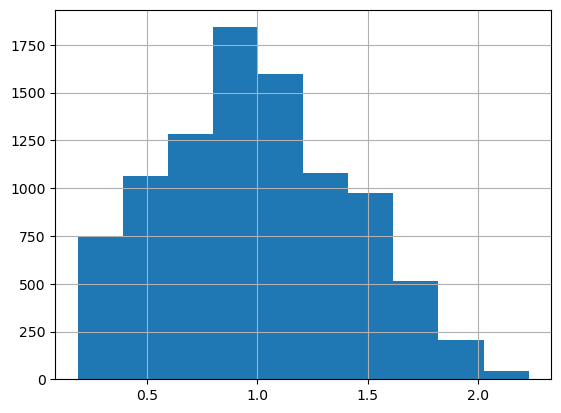

In [43]:
#Plot a histogram of absolute humidity. 
df_full["absolute_humidity"].hist()

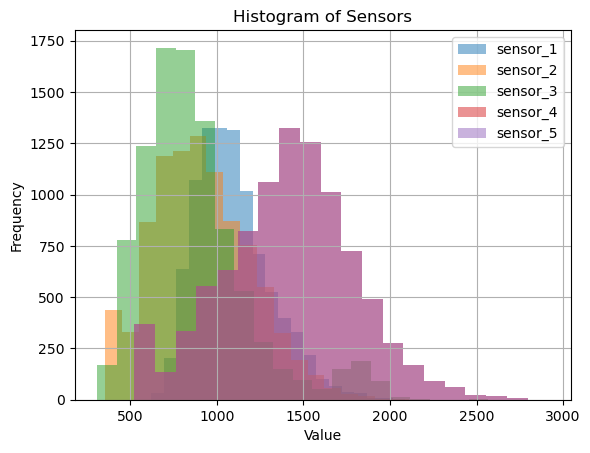

In [44]:
#Plot sensor 1 - 5 histograms overlaid on same figure as each other (not the same figure as absolute humidity). 

df_full['sensor_1'].hist(alpha=0.5, bins=20, label='sensor_1')
df_full['sensor_2'].hist(alpha=0.5, bins=20, label='sensor_2')
df_full['sensor_3'].hist(alpha=0.5, bins=20, label='sensor_3')
df_full['sensor_4'].hist(alpha=0.5, bins=20, label='sensor_4')
df_full['sensor_4'].hist(alpha=0.5, bins=20, label='sensor_5')
plt.legend()
plt.title('Histogram of Sensors')
plt.xlabel('Value')
plt.ylabel('Frequency')

# Show plot
plt.show()

In [45]:
df_full["day_of_week"] = df_full["date_time"].dt.dayofweek

In [46]:
def find_weekend(x):
    if x>4:
        return "weekend"
    else:
        return "weekday"


In [47]:
df_full["day_type"] = df_full["day_of_week"].apply(find_weekend)

In [48]:
df_full["day_type"].value_counts()

weekday    6669
weekend    2689
Name: day_type, dtype: int64

<AxesSubplot:xlabel='sensor_1', ylabel='sensor_2'>

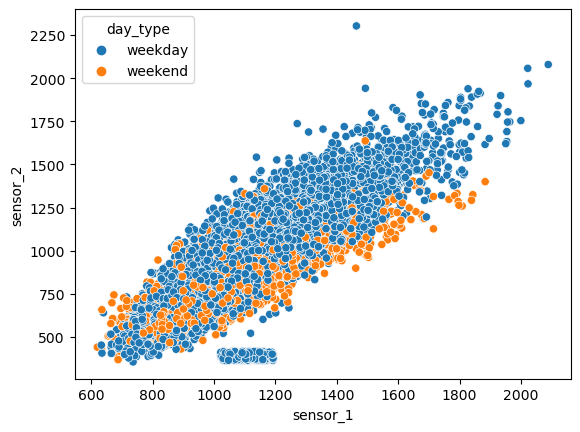

In [49]:
# Create a scatter plot of sensor 1 vs sensor 2 coloured blue if the data point is a weekday, red otherwise. 

sns.scatterplot(data=df_full, x="sensor_1", y="sensor_2", hue="day_type")


<AxesSubplot:xlabel='sensor_3', ylabel='sensor_4'>

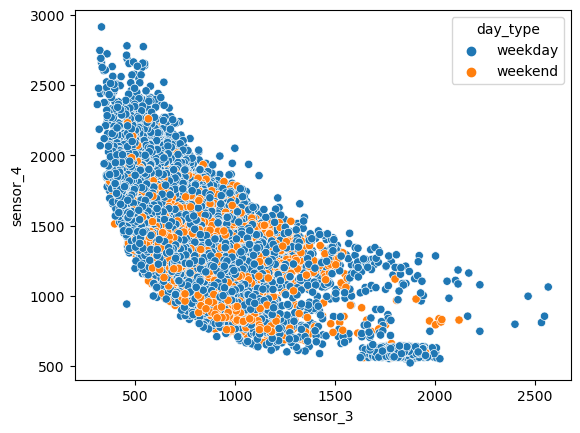

In [50]:
# again? Create a scatter plot of sensor 3 vs sensor 4 instead?

sns.scatterplot(data=df_full, x="sensor_3", y="sensor_4", hue="day_type")


In [51]:
print(df_full["sensor_one_binned"].value_counts())
print(df_full["sensor_two_binned"].value_counts())

0.5-0.8      4953
0.2-0.5      4272
0.8-0.85       76
0.85-1.00      57
Name: sensor_one_binned, dtype: int64
0.2-0.5      7005
0.5-0.8      1874
0-0.2         461
0.8-0.85       14
0.85-1.00       4
Name: sensor_two_binned, dtype: int64


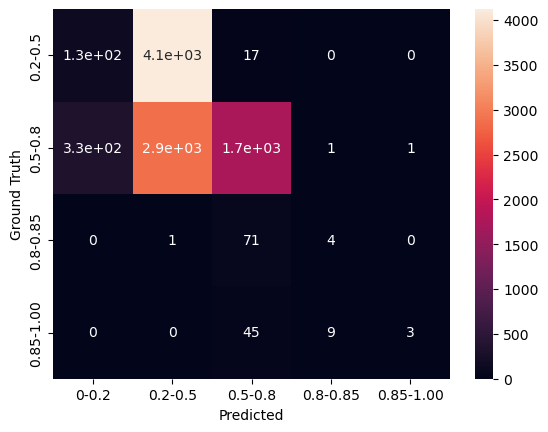

In [52]:
# Plot a confusion matrix of predicted vs truth where you treat “sensor_one_binned” values as ground truth values and “sensor_two_binned” as predicted
confusion_matrix = pd.crosstab(df_full['sensor_one_binned'], df_full['sensor_two_binned'], rownames=['Ground Truth'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)
plt.show()

# 8

In [55]:
df_train["date_time"] = pd.to_datetime(df_train["date_time"],infer_datetime_format=True)
df_train["date"] = df_train["date_time"].dt.date

In [56]:
#Create a 70%/30% data split from the train.csv and ensure that observations from the same day are not split between sets. 
trainindex, testindex = next(GroupShuffleSplit(test_size=.30, n_splits=2, random_state = 7).split(df_train, groups=df_train['date']))

In [57]:
train = df_train.iloc[trainindex]
test = df_train.iloc[testindex]


In [58]:
print(train.shape)
print(test.shape)

(4974, 13)
(2137, 13)


# 9

In [59]:
df_group.to_csv("df_group.csv", index=False)
df_full.to_csv("df_full.csv", index=False)
df_filtered.to_csv("df_filtered.csv", index=False)